In [1]:
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import sklearn
import entropy_estimators as ee
import time
import itertools
import scipy.io
import aif_paif as mi

/Users/muuzh/Library/Python/3.8/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


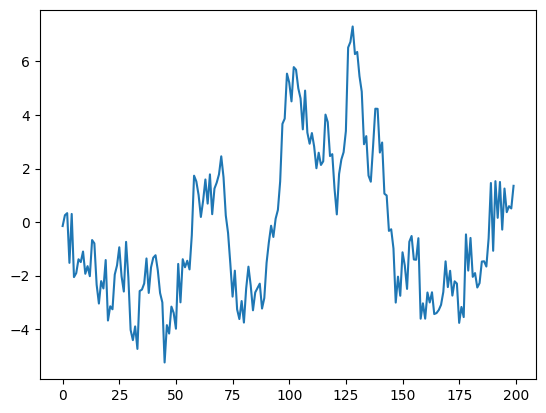

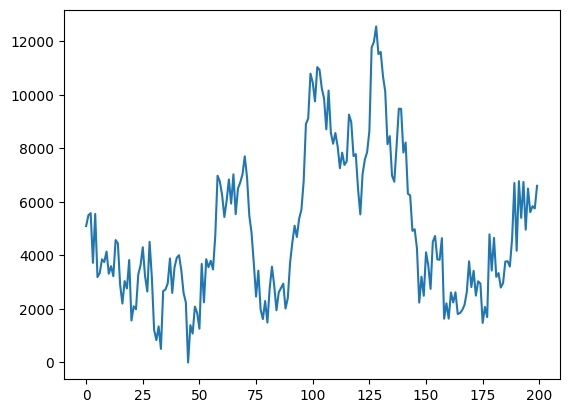

12549
0
	AIF(k=10)
[1.         0.99507042 0.99407585 0.99307603 0.99341112 0.99240754
 0.99139861 0.99174532 0.99073264 0.98971452 0.9886909 ]
[1.         0.91866145 0.88388365 0.81812897 0.76556864 0.70723037
 0.65521802 0.60724173 0.55782185 0.53545683 0.50487735]
[ 1.          0.92327784  0.27358593 -0.15237207 -0.03982688 -0.0259875
 -0.00825725  0.01896451 -0.03284906  0.16196611  0.0254339 ]


In [4]:
ar = np.array([0.6, 0.3])
ARpara = np.r_[1, -ar]
test_series = ArmaProcess(ARpara, [1]).generate_sample(200)
plt.figure
plt.plot(test_series)
plt.show()


int_test_series = np.around((test_series+np.abs(min(test_series)))*1000).astype(int)
plt.figure
plt.plot(int_test_series)
plt.show()

print(max(int_test_series))
print(min(int_test_series))

# calculate the aif of lag 1
AR1aif = mi.aif(int_test_series, max(int_test_series)+1, kmax=11)
print(AR1aif)
# AR1paif = mi.paif(int_test_series, max(int_test_series)+1, kmax=)
# print(AR1paif)
print(acf(int_test_series, nlags=10, fft=True))
print(pacf(int_test_series, nlags=10))
